In [1]:
%cd ..
%load_ext autoreload


/home/teo/userdata/git_libraries/jgb-omr


In [6]:
import torch
from omr_cnn import Dataset, OMRModel, Trainer, get_nll_loss, Tokenizer, pad_collate

dataset = Dataset('labels_from_ls.csv', 'jeongganbo-png/unique-char-pngs/')
pre_dataset = Dataset('cv_label.csv', 'jeongganbo-png/splited-pngs/')

tokenizer = Tokenizer(vocab_txt_fn='tokenizer.txt')
dataset.tokenizer = tokenizer
pre_dataset.tokenizer = tokenizer

model = OMRModel(128, vocab_size=len(tokenizer.vocab), num_gru_layers=2)
model.load_state_dict(torch.load('omr_model_best.pt', map_location='cpu')['model'])
model.eval()

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=pad_collate)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [10]:
from tqdm.auto import tqdm
dev = 'cuda'
model.to(dev)

losses = []
for i, batch in tqdm(enumerate(dataloader)):
  img, label, shifted_label = batch
  pred = model(img.to(dev), label.to(dev))
  loss = get_nll_loss(pred, shifted_label)
  losses.append(loss.item())

0it [00:00, ?it/s]

In [17]:
sorted_indexes = sorted(range(len(losses)), key=lambda x: -losses[x])
print(sorted_indexes)


[978, 531, 940, 822, 61, 1182, 699, 1205, 774, 1286, 440, 1181, 925, 646, 99, 308, 1208, 1161, 725, 117, 1218, 474, 343, 98, 1262, 269, 329, 650, 198, 135, 89, 441, 887, 635, 707, 863, 1196, 279, 1188, 727, 1210, 1193, 21, 643, 1237, 976, 1212, 1206, 1244, 922, 642, 794, 210, 1215, 402, 1211, 86, 262, 1054, 1064, 969, 1202, 448, 742, 1209, 1277, 3, 1045, 793, 773, 420, 636, 637, 1203, 770, 15, 651, 654, 967, 1201, 1214, 335, 1187, 397, 50, 1273, 133, 694, 412, 490, 492, 945, 408, 507, 599, 644, 728, 641, 874, 972, 648, 1183, 47, 192, 715, 847, 1033, 1060, 928, 139, 4, 377, 735, 240, 17, 215, 837, 83, 968, 109, 287, 864, 62, 603, 1204, 409, 131, 87, 1061, 748, 889, 219, 634, 951, 49, 357, 58, 60, 463, 376, 118, 255, 1270, 1235, 1027, 437, 51, 340, 171, 278, 751, 1157, 611, 252, 124, 417, 1131, 149, 271, 1058, 1092, 909, 675, 7, 732, 1050, 363, 345, 810, 772, 254, 760, 868, 465, 629, 1143, 199, 224, 947, 486, 1026, 53, 1047, 914, 234, 946, 1124, 451, 884, 277, 174, 80, 504, 776, 657, 112

In [45]:
dataset.df.iloc[sorted_indexes[110:120]]

,filename,title,inst_name,jng_idx,label
4,관악영산회상-가락덜이_haegeum_48.png,관악영산회상-가락덜이,haegeum,48,중_ㅅ:5
377,남창반우반계-편락_daegeum_357.png,남창반우반계-편락,daegeum,357,청임_니레:2 -:5 청무:7 청임:9
735,여민락_piri_600.png,여민락,piri,600,중_ㅅ:5
240,남창계면-이수대엽_geomungo_95.png,남창계면-이수대엽,geomungo,95,배중:2 -:5 배임_자출:8
17,관악영산회상-군악_haegeum_499.png,관악영산회상-군악,haegeum,499,남_덧길이:10 임_반길이:11
215,남창계면-언편_geomungo_209.png,남창계면-언편,geomungo,209,배중_퇴성:2 -:5 배황_자출:8
837,자진한잎-경풍년-우조두거_haegeum_123.png,자진한잎-경풍년-우조두거,haegeum,123,황_니나:2 -_추성:5 배남:8
83,관악영산회상-중령산_daegeum_213.png,관악영산회상-중령산,daegeum,213,-:2 -:4 노라:6 청협:8
968,관악영산회상-군악_haegeum_197.png,관악영산회상-군악,haegeum,197,남:5
109,남창계면-두거_daegeum_242.png,남창계면-두거,daegeum,242,임_?:2 임:5 -:8


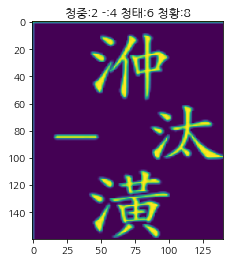

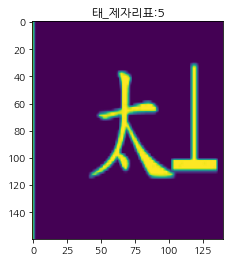

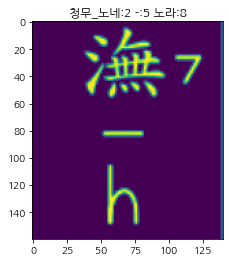

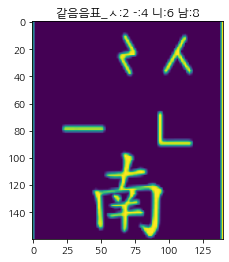

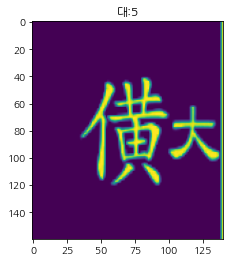

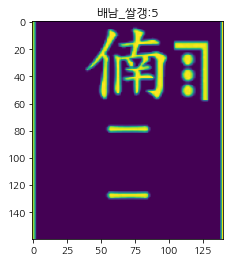

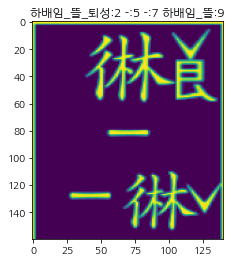

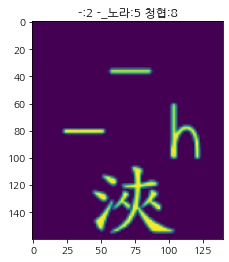

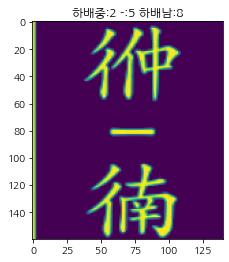

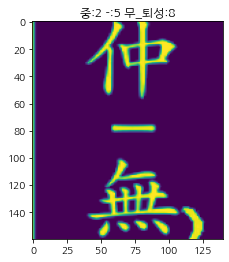

In [47]:
import matplotlib.pyplot as plt
import koreanize_matplotlib


for idx in sorted_indexes[120:130]:
  img, label = dataset[idx]
  plt.imshow(img[0])
  plt.title(tokenizer.decode(label[1:-1]))
  plt.show()